# Creating a Baseline Model

## Calculating the baseline model (that predicts the average of the bdi from its origin to  2021-11-29)'s MAE and MSE and RMSE

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
prescaled_df = pd.read_csv("../raw_data/data/merged_data_prescaling.csv")
postscaled_df = pd.read_csv("../raw_data/data/merged_data_postscaling.csv")

In [76]:
prescaled_df.head(2)

,time,bdi,cgdp,diff,cgdp_growth,csteel,CIP
0,1995-01-16,2059.0,5.857736e+11,NaN,NaN,7.380742e+06,13.900686
1,1995-01-23,1983.0,5.890383e+11,3.264685e+09,0.005542,7.349355e+06,14.721669


In [98]:
# to delete first row with NaN values
prescaled_df = prescaled_df[prescaled_df["time"] > "1995-01-16"]

In [78]:
prescaled_df.head(2)

,time,bdi,cgdp,diff,cgdp_growth,csteel,CIP
1,1995-01-23,1983.0,5.890383e+11,3.264685e+09,0.005542,7.349355e+06,14.721669
2,1995-01-30,1959.0,5.923030e+11,3.264685e+09,0.005512,7.317968e+06,15.351956


In [79]:
prescaled_df.tail(2)

,time,bdi,cgdp,diff,cgdp_growth,csteel,CIP
1390,2021-11-22,2767.0,1.765894e+13,5.842392e+10,0.003308,8.113000e+07,4.030326
1391,2021-11-29,3171.0,1.771737e+13,5.842392e+10,0.003298,8.507333e+07,4.227298


In [80]:
bdi_mean = prescaled_df["bdi"].mean()

In [81]:
bdi_mean_list = [bdi_mean for i in range(len(prescaled_df))] 

In [82]:
len(bdi_mean_list)

1391

In [83]:
len(prescaled_df)

1391

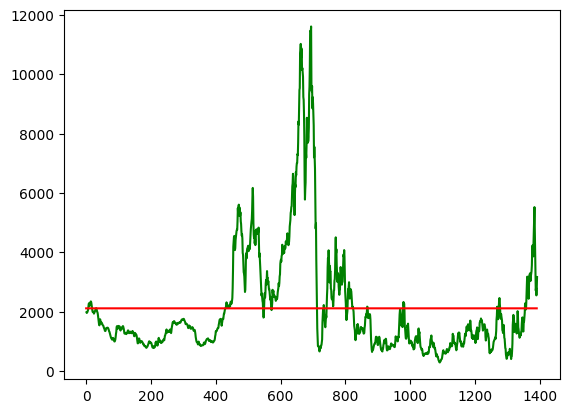

In [84]:
fig, ax = plt.subplots()
ax.plot(prescaled_df.index , prescaled_df["bdi"], color='green')
ax.plot(bdi_mean_list, color="red")

In [85]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [86]:
y_pred_baseline = pd.DataFrame(bdi_mean_list)

In [87]:
y_pred_baseline.head(2)

,0
0,2115.301222
1,2115.301222


In [88]:
y_pred_baseline.shape

(1391, 1)

In [89]:
y_pred_baseline.set_index(prescaled_df["time"], inplace=True) 

In [90]:
y_pred_baseline.head(5)

,0
time,
1995-01-23,2115.301222
1995-01-30,2115.301222
1995-02-06,2115.301222
1995-02-13,2115.301222
1995-02-20,2115.301222


In [91]:
y_true_baseline = pd.DataFrame(prescaled_df["bdi"])

In [92]:
y_true_baseline.shape

(1391, 1)

In [93]:
y_true_baseline.set_index(prescaled_df["time"], inplace=True)

In [94]:
y_true_baseline.head(5)

,bdi
time,
1995-01-23,1983.0
1995-01-30,1959.0
1995-02-06,1980.0
1995-02-13,1992.0
1995-02-20,2027.0


In [95]:
mean_absolute_error(y_true_baseline, y_pred_baseline)

1276.126222749616

In [96]:
MSE = mean_squared_error(y_true_baseline, y_pred_baseline)
MSE

3456457.320480174

In [97]:
RMSE = np.sqrt(mean_squared_error(y_true_baseline, y_pred_baseline))
RMSE

1859.1550017360505